Import libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

Define functions

In [2]:
def init_centers(X, k):
  return X[np.random.choice(range(X.shape[0]), size=k, replace=False)]

In [3]:
def euclidean_distance(a, b):
  return np.linalg.norm(a-b)

In [4]:
def assign_points_to_clusters(X, centers):
  distances = np.array([euclidean_distance(x, c) for x in X for c in centers]).reshape(len(X), len(centers))
  # return an array has shape = (X.shape[0], ), value of each = index of cluster centers
  return np.argmin(distances, axis=1)

In [5]:
def update_centers(X, labels, k):
  centers = np.zeros((k, X.shape[1]))
  for i in range(k):
    # labels == i to find index of all points belong to that label
    # then calc mean for those points
    centers[i] = np.mean(X[labels==i], axis=0)
  return centers

Main script to implement K-Means

In [6]:
iris = load_iris()
X = iris.data[:, -2:]

In [11]:
# function to fit K_Means model and return K clusters centers
def fit_KMeans(X, k, iters=100):
  centers = init_centers(X, k)
  old_labels = None
  for i in range(iters):
    labels = assign_points_to_clusters(X, centers)
    if np.all(labels == old_labels):
      break
    centers = update_centers(X, labels, k)
    old_labels = labels
  return centers, labels

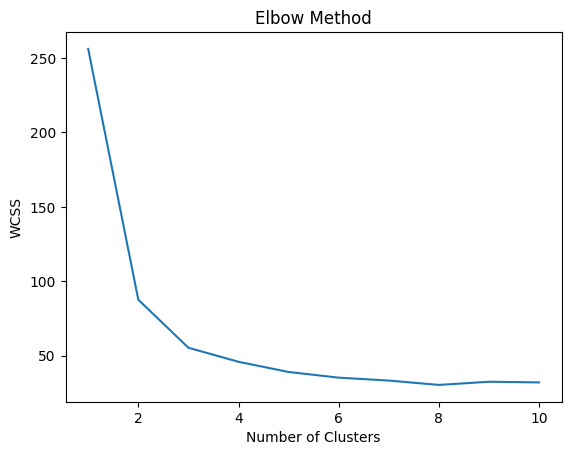

In [12]:
# Elbow method to find the optimal number of clusters (K)
wcss = []
n = 10 # number of K to test
for k in range(1, n+1):
  centers, labels = fit_KMeans(X, k)
  # calculate within-cluster sum of squares (WCSS) value
  # for each point, calc dist between the point and the corresponding center point of its cluster
  wcss.append(sum([euclidean_distance(X[i], centers[labels[i]]) for i in range(len(X))]))

# plot WCCS to determine optimal K
plt.plot(range(1, n+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

So we can use k=2 or k=3

In [7]:
def main_KMeans(X, k=3, iters=100):
  centers = init_centers(X, k)
  old_labels = None
  for i in range(iters):
    labels = assign_points_to_clusters(X, centers)
    # check if clusters are the same
    if np.all(labels == old_labels):
      break
    centers = update_centers(X, labels, k)
    old_lables = labels

  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
  plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='X')
  plt.title('Clusters and Centroids')
  plt.xlabel('Feature 1')
  plt.xlabel('Feature 2')
  plt.show()

  return centers

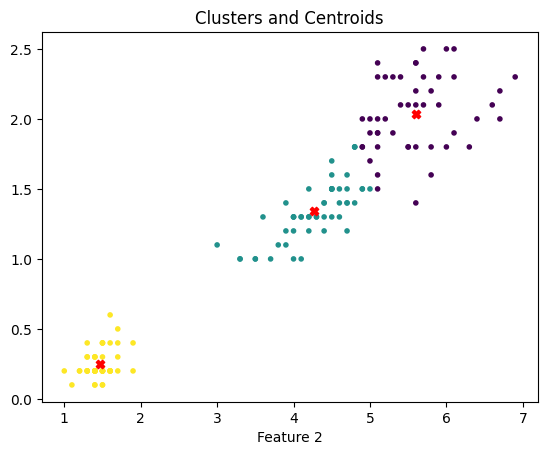

array([[5.59583333, 2.0375    ],
       [4.26923077, 1.34230769],
       [1.462     , 0.246     ]])

In [8]:
centers_k3 = main_KMeans(X, k=3, iters=100)
centers_k3

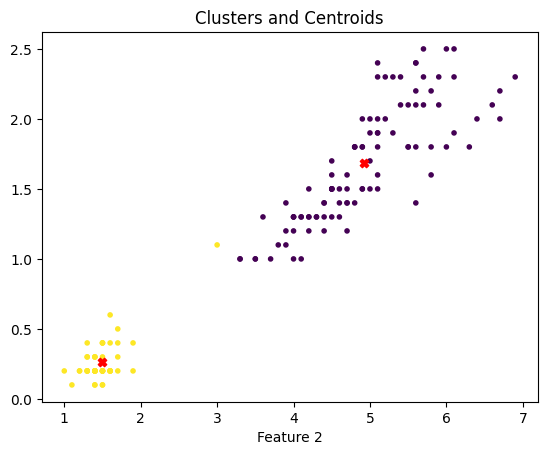

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [13]:
centers_k2 = main_KMeans(X, k=2, iters=100)
centers_k2

Double check with the original dataset and its label

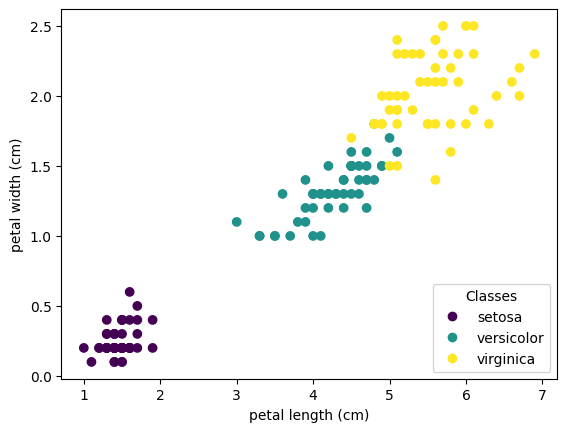

In [14]:
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
iris_features = iris.feature_names

_, ax = plt.subplots()
scatter = ax.scatter(iris_X[:, 2], iris_X[:, 3], c=iris.target)
ax.set(xlabel=iris_features[2], ylabel=iris_features[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)